In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 문제
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('./data/fin_df.csv')
data.head()

,Unnamed: 0,분류명,상대수,여행기간,전체키워드내용,전체컨텐츠내용,검색어,평점,리뷰수
0,0,친구,2,3,"명소,친구와,힐링/휴식,",거슨새미오름,거슨새미오름,4.2,13
1,1,친구,2,3,"명소,친구와,힐링/휴식,",도두 무지개 해안도로,도두 무지개 해안도로,4.4,"3,371"
2,2,친구,2,3,"명소,친구와,힐링/휴식,",봄날카페,봄날카페,4.7,18
3,3,친구,2,3,"명소,친구와,힐링/휴식,",블루하와이리조트,블루하와이리조트,3.9,939
4,4,친구,2,3,"명소,친구와,힐링/휴식,",제주산방산탄산온천,제주산방산탄산온천,4.3,863


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 여행지 데이터 예시 (여행지명, 카테고리 키워드)
places_data = data
# 콘텐츠 기반 필터링

import pandas as pd

# 기존 DataFrame 예시
# 여기서 df는 이미 존재하는 DataFrame을 가정합니다.
# df에는 'name'과 'keywords' 열이 존재한다고 가정합니다.
# 아래 코드는 기존 DataFrame의 'name'과 'keywords' 열을 추출합니다.
# 여러분이 사용하고 있는 DataFrame에 따라 코드를 조정해야 합니다.

# 'name'과 'keywords' 열 추출
names = data['전체컨텐츠내용'].tolist()
keywords = data['전체키워드내용'].tolist()

# 추출한 열을 딕셔너리로 변환하여 places_data 생성
places_data = [{'name': name, 'keywords': keyword} for name, keyword in zip(names, keywords)]
places_data

[{'name': '거슨새미오름', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '도두 무지개 해안도로', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '봄날카페', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '블루하와이리조트', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '제주산방산탄산온천', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '새별오름', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '서귀포매일올레시장', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '아르떼뮤지엄 제주', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '용머리해안', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '크라운돼지', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': '함덕해수욕장', 'keywords': '명소,친구와,힐링/휴식,'},
 {'name': 'Noksallo Yuchae Kkot Gil 녹살로 유채꽃길', 'keywords': '체험,레저,친구와,'},
 {'name': '레이저서바이벌M', 'keywords': '체험,레저,친구와,'},
 {'name': '마라도해양도립공원', 'keywords': '체험,레저,친구와,'},
 {'name': '만장굴', 'keywords': '체험,레저,친구와,'},
 {'name': '메이즈랜드', 'keywords': '체험,레저,친구와,'},
 {'name': '섭지코지', 'keywords': '체험,레저,친구와,'},
 {'name': '성산일출봉', 'keywords': '체험,레저,친구와,'},
 {'name': nan, 'keywords': '체험,레저,친구와,'},
 {'name': '잠수함관광(우도잠수함)', 'keywords': '체험,레저

In [4]:
# 사용자의 카테고리 선택
user_categories = ['혼자', '자연', '걷기']  # 예시로 사용자가 선택한 카테고리

In [5]:
# 각 여행지의 특성을 벡터화 (TF-IDF 사용)
corpus = [place['keywords'] for place in places_data]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

In [6]:
# 사용자의 선택 카테고리를 기반으로 유사한 여행지 추천
user_preferences = ' '.join(user_categories)
user_tfidf = vectorizer.transform([user_preferences])
user_tfidf

<1x22 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [7]:
# 코사인 유사도 계산
similarities = cosine_similarity(user_tfidf, tfidf_matrix)
similarities

array([[0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# 추천 여행지 찾기
num_recommendations = 10  # 추천할 여행지 개수
similar_indices = similarities.argsort(axis=1)[:, ::-1]
recommended_places = []
for i in range(num_recommendations):
    idx = similar_indices[0][i]
    recommended_places.append(places_data[idx]['name'])

print(f"사용자에게 추천하는 여행지: {recommended_places}")

사용자에게 추천하는 여행지: ['휴애리 자연생활공원', '제주산방산탄산온천', '신엄리 해안도로', '한담해안산책로', '쇠소깍 명승지', '세화해수욕장', '서귀포자연휴양림', '새별오름', '제주 산굼부리', '우도']


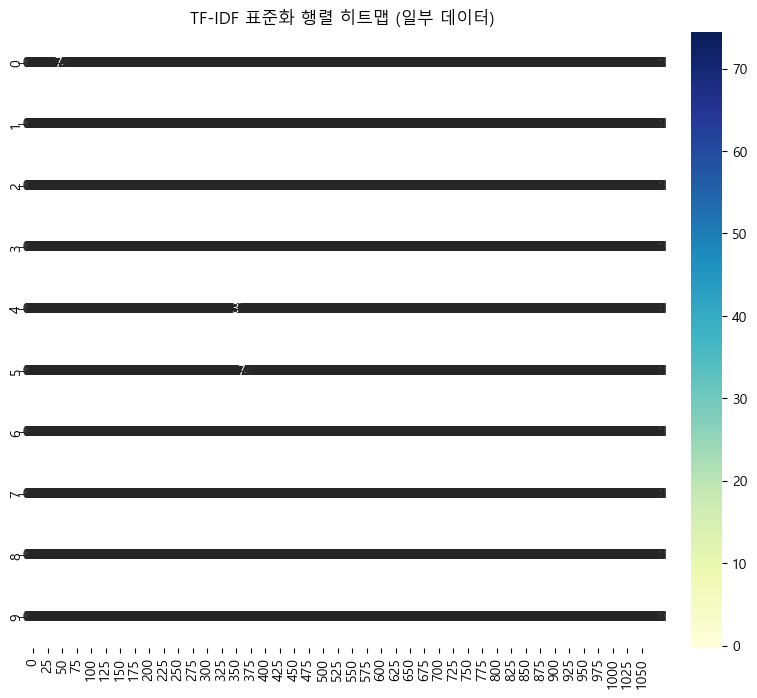

ValueError: Shape of passed values is (5548, 2), indices imply (3820, 2)

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# 'name' 열 추출
names = [place['name'] for place in places_data]

# NaN 값 처리: NaN을 빈 문자열로 대체
names = ["" if pd.isna(name) else name for name in names]

# 각 'name'을 공백을 기준으로 단어로 분할
tokenized_names = [name.split() for name in names]

# Flatten: 2D 리스트를 1D 리스트로 변환
flat_names = [word for sublist in tokenized_names for word in sublist]

# TF-IDF 행렬 생성
vectorizer = TfidfVectorizer()
name_tfidf_matrix = vectorizer.fit_transform(flat_names)

# 표준화 (Standardization) - 필요에 따라
scaler = StandardScaler()
name_tfidf_matrix_std = scaler.fit_transform(name_tfidf_matrix.toarray())

# K-Means 클러스터링
num_clusters = 5  # 예시로 5개의 클러스터를 가정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(name_tfidf_matrix_std)

# 2. 히트맵
plt.figure(figsize=(10, 8))
# 일부 데이터만 선택하여 시각화 (예: 처음 10개의 여행지)
selected_tfidf_matrix = name_tfidf_matrix_std[:10]
sns.heatmap(selected_tfidf_matrix, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('TF-IDF 표준화 행렬 히트맵 (일부 데이터)')
plt.show()

# 3. 2차원 시각화 (t-SNE 활용)
tsne = TSNE(n_components=2, init='random', random_state=42)
tfidf_matrix_2d = tsne.fit_transform(name_tfidf_matrix_std)  # 수정: name_tfidf_matrix_std로 변경

tfidf_df_2d = pd.DataFrame(tfidf_matrix_2d, columns=['Dimension 1', 'Dimension 2'], index=names)

plt.figure(figsize=(12, 10))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=tfidf_df_2d, hue=kmeans.labels_, palette='viridis', s=100)  # 수정: kmeans_std.labels_에서 kmeans.labels_로 변경
plt.title('t-SNE를 사용한 표준화된 TF-IDF 행렬 2차원 시각화 (뽑아낸 cluster를 기준으로)')
plt.show()


### TF-IDF 행렬을 차원 축소해서 그래프화(전체 여행지를 보여줌)

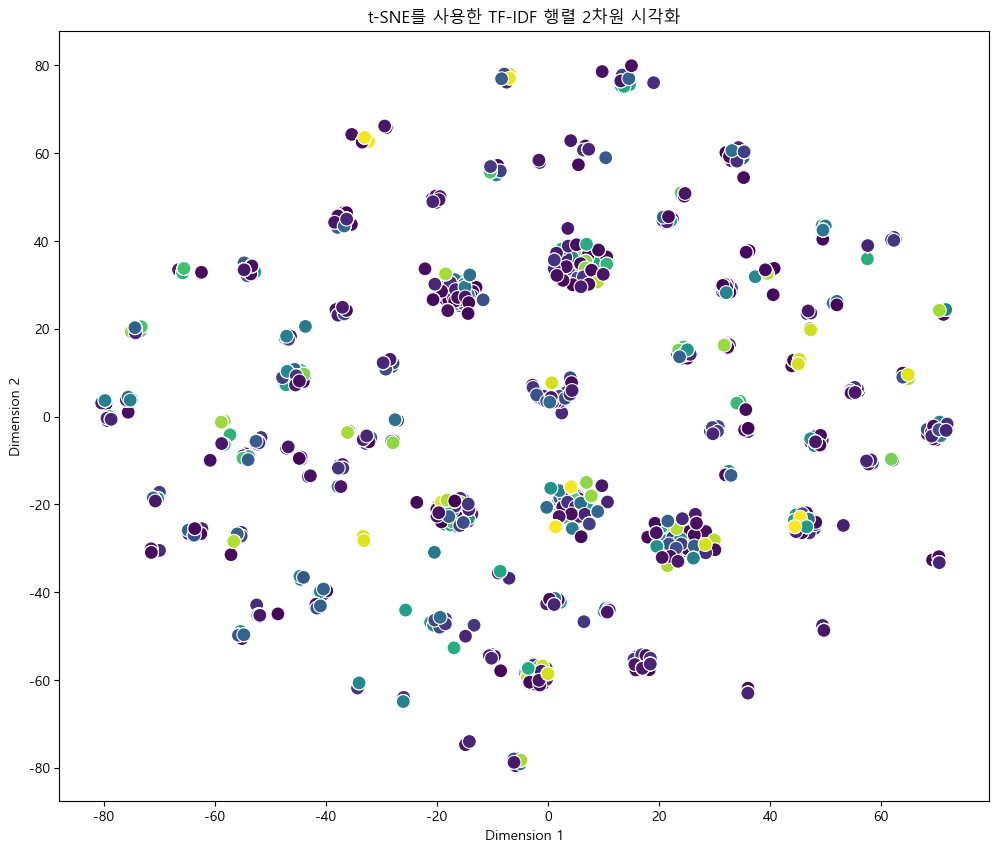

In [ ]:
# TF-idf 행렬 말고 전체 데이터를 가지고 군집화(관광지 다 포함해서 군집)
# 키워드, 여행지 데이터만 합쳐서 따로 군집화를 진행하기

# 전체 여행지가 입력되어있음 유사도에 따라 색깔이 다름
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# TF-IDF 행렬의 차원을 2차원으로 축소
tsne = TSNE(n_components=2, init='random', random_state=42)
tfidf_matrix_2d = tsne.fit_transform(tfidf_matrix.toarray())  # toarray()로 밀집 행렬로 변환

# 축소된 차원의 데이터를 DataFrame으로 변환
# place_data에서 여행지 이름 추출 - 전체 여행
places_names = [place['name'] for place in places_data]
tfidf_df_2d = pd.DataFrame(tfidf_matrix_2d, columns=['Dimension 1', 'Dimension 2'], index=places_names)

# 시각화
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x='Dimension 1', y='Dimension 2', data=tfidf_df_2d, hue=tfidf_df_2d.index, palette='viridis', s=100)
scatter.legend_.remove()  # 범례 제거
plt.title('t-SNE를 사용한 TF-IDF 행렬 2차원 시각화')
plt.show()

### 카테고리별로 얼마나 분포되어 있는지를 확인 (word cloud)

In [ ]:
# pip install wordcloud

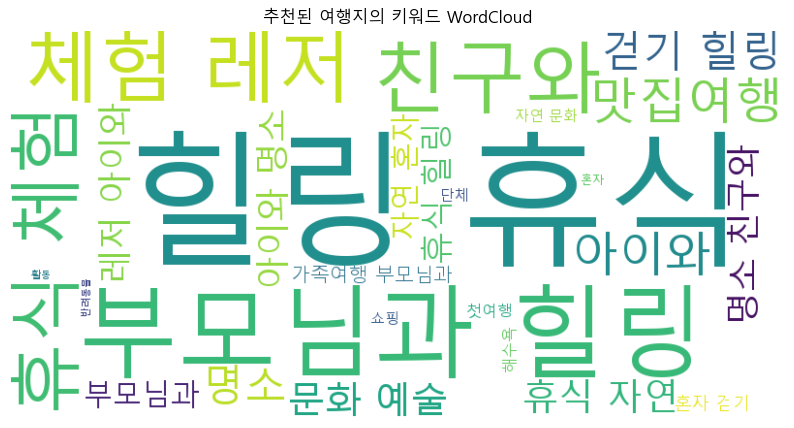

In [ ]:
# 추천된 여행지에서 키워드(카테고리)를 추출한다.
from wordcloud import WordCloud

recommended_keywords = [place['keywords'] for place in places_data if place['name'] in recommended_places]
recommended_keywords_str = ' '.join(recommended_keywords)

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white',  font_path=path).generate(recommended_keywords_str)

# 시각화 카테고리별로 얼마나 분포되어 있는지를 확인
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('추천된 여행지의 키워드 WordCloud')
plt.show()


### 지도 위에 마커설정

In [ ]:
# pip install folium
import folium

# 지도 생성
# 이를 시각화하고 싶으면 결과값에서 몇개만 추출 -> 추출한 거를 통해서 지역명으로 위경도 추출 -> 이 코드에 대입해야 실행가능하다.
# place_location 부분에 추출한 위경도를 넣고 마커를 추가하는 방식임

# 현재는 서울에서 마커가 나타나도록 설정
# 지도 생성 (width와 height 매개변수로 크기 조절)
travel_map = folium.Map(location=[37.5665, 126.9780], zoom_start=10, width='60%', height='60%')


# 여행지에 대한 위치 정보 (예시 데이터 사용)
places_locations = {
    '여행지1': {'latitude': 37.5, 'longitude': 127.0},
    '여행지2': {'latitude': 37.6, 'longitude': 126.8},
    '여행지3': {'latitude': 37.7, 'longitude': 126.9},
    # ... 추가적인 여행지와 위치 정보
}

# 추천된 여행지 마커 추가
for place, location_info in places_locations.items():
    folium.Marker([location_info['latitude'], location_info['longitude']], popup=place).add_to(travel_map)

# 지도 시각화
travel_map